In [ ]:
#import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics.pairwise import euclidean_distances
from sklearn import datasets
from sklearn.manifold import TSNE
from scipy import cluster
import sklearn.metrics.pairwise as smp

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#load the digits dataset into memory
digits = datasets.load_digits()

digits_data = digits.data #features
digits_label = digits.target #labels

#convert to a dataframe
data = pd.DataFrame(digits_data)
labels = digits_label

In [ ]:
# Print the dataframe
print(data.head())

    0    1    2     3     4     5    6    7    8    9   ...   54   55   56  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4  0.0  0.0   2.0  16.0   4.0  0.0  0.0  

[5 rows x 64 columns]


In [ ]:
# Displaying the number of instances and attributes
print(data.shape)

(1797, 64)


In [ ]:
# Total null values in each column
data.isna().sum()

0     0
1     0
2     0
3     0
4     0
     ..
59    0
60    0
61    0
62    0
63    0
Length: 64, dtype: int64

In [ ]:
# number of instances belonging to each cluster
print(len(np.unique(labels))) 

10


In [ ]:
#Calculating tsne
model = TSNE(n_components = 2, random_state = 0, perplexity = 30)
tsne = model.fit_transform(data)

labels=np.array(labels).reshape(-1,1)

# creating a new data frame which help us in plotting the t SNE transformed data
tsne_data = np.concatenate((tsne, labels), axis=1)

tsne_df = pd.DataFrame(data = tsne_data,columns =("Dim_1", "Dim_2", "Digits Label"))

# Q2 (b)

# Advantages and disadvantages of DBSCAN:

Two advantages of DBSCAN:
 •	Can be used to find clusters of arbitrary shape
 •	There is no need to specify the number of clusters in advance.
Two disadvantages of DBSCAN:
 •	It does not work well with datasets with varying densities and very high dimensions.
 •	Determining an appropriate distance threshold can be challenging.


# Q2 (c)

The density based clustering method chosen is HDBSCAN. Its two advantages are:
 •	DBSCAN is more sensitive to noise which may lead to false clustering. HDBSCAN is robust to noise.
 •	DBSCAN works well on low density data only. HDBSCAN gives good performance on high density data.

# Q2 (d)

# Computing clustering using HDBSCAN on Tumor dataset (dataset 2)

In [ ]:
#  install hdbscan library
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import the library for hdbscan
import hdbscan

In [ ]:
# Compute clustering using HDBSCAN on UCI ML Handwritten digits dataset (dataset 1) 
hdb = hdbscan.HDBSCAN(min_cluster_size=40, min_samples=1).fit(data)

# finding the labels for clusters formed
hdblabels = hdb.labels_

# printing unique cluster labels
# The clusters corresponding to -1 represents noise 
np.unique(hdblabels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9])

In [ ]:
# Number of clusters
no_clusters = len(np.unique(hdblabels))

# Percentage of noise points
no_noise = (np.sum(np.array(hdblabels) == -1, axis=0)*100)/len(hdblabels)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %f' % no_noise)

Estimated no. of clusters: 11
Estimated no. of noise points: 20.478575


<Figure size 864x720 with 0 Axes>

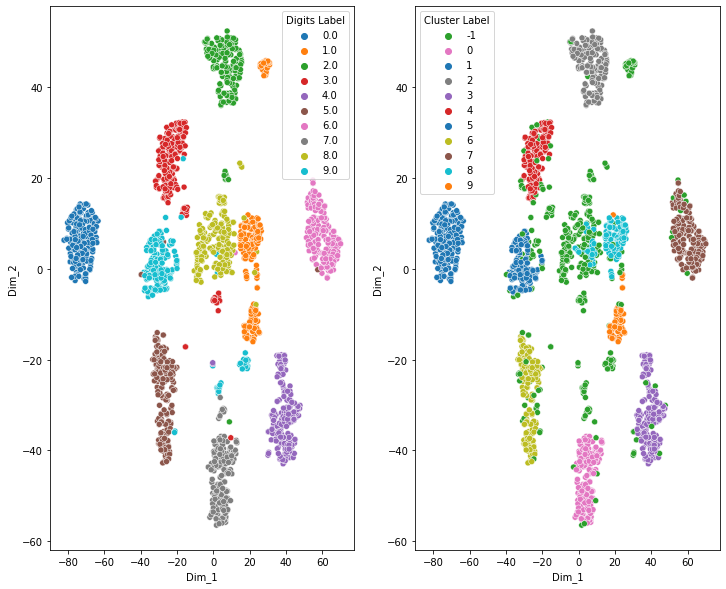

In [ ]:
# # reshaping hdblabels into a 2 dimensional array
hdblabels = np.reshape(hdblabels,(-1,1))

tsne_df_hdb=tsne_df.copy()

tsne_df_hdb['Cluster Label']=hdblabels

plt.figure(figsize = (12, 10))

# Return a list of colors in colors variable
colors = sns.color_palette(n_colors=11)

modes_gt=tsne_df_hdb['Digits Label'].unique()
palette_gt = {mode: color for mode, color in zip(modes_gt, colors)}

modes_clus=tsne_df_hdb['Cluster Label'].unique()
palette_clus = {mode: color for mode, color in zip(modes_clus, colors)}

# visualizing the HDBSCAN based clustering on t SNE transformed data

plt.figure(figsize = (12, 10))
ax = plt.subplot(1,2,1)
sns.scatterplot(x="Dim_1", y="Dim_2", data=tsne_df_hdb, ax= ax,hue='Digits Label',palette=palette_gt,alpha=1);
ax = plt.subplot(1,2,2)
sns.scatterplot(x="Dim_1", y="Dim_2", data=tsne_df_hdb, ax= ax, hue='Cluster Label',palette=palette_clus,alpha=1);
plt.show()

# clustering using HDBSCAN on UCI ML Handwritten digits dataset (dataset 1) 


In [ ]:
# evaluating HDBSCAN performance

# importing library for calculating performance metrics for sklearn 
import sklearn.metrics.pairwise as smp

# calculating intrinsic measures : silhouette score, Davies Bouldin score and calinski_harabasz_score
pairwise_dist_sk = smp.euclidean_distances(data)

SIL_s=metrics.silhouette_score(pairwise_dist_sk , hdblabels)
DB_s=metrics.davies_bouldin_score(pairwise_dist_sk , hdblabels)
CH_s=metrics.calinski_harabasz_score(pairwise_dist_sk , hdblabels)

# calculating extrinsic measures: rand index and completeness 
y_true=np.array(labels).reshape(-1)
y_pred=np.array(hdblabels).reshape(-1)

RI_s=metrics.rand_score(y_true,y_pred)
CM_s=metrics.completeness_score(y_true,y_pred)

print('Intrinsic Measure:\n')
print(f'Silhouette score: {SIL_s:.3f}')
print(f'Davies-Bouldin score: {DB_s:.3f}')
print(f'Calinski and Harabasz score: {CH_s:.3f}')
print('')
print('Extrinsic Measure:\n')
print(f'Random index: {RI_s:.3f}')
print(f'Completeness score: {CM_s:.3f}')


Intrinsic Measure:

Silhouette score: 0.199
Davies-Bouldin score: 1.806
Calinski and Harabasz score: 250.756

Extrinsic Measure:

Random index: 0.939
Completeness score: 0.816


## Standard behaviour of the cluster validity indices used

The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

The minimum value for Davies-Bouldin score is 0, with lower values indicating better clustering.

The higher the Calinski and Harabasz score , the better the performances. 

The Rand Index may only yield a value between 0 and 1 with higher value indivcating better clustering. 

Completeness Score is a value between 0.0 and 1.0. 1.0 stands for perfectly complete labeling.


# Computing clustering using HDBSCAN on Tumor dataset (dataset 2) 

In [ ]:
# mounting the google drive for importing dataset
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# changing the directory to where the folder for the dataset is located
%cd /content/drive/My Drive//TCGA-PANCAN-HiSeq-801x20531/


/content/drive/My Drive/TCGA-PANCAN-HiSeq-801x20531


In [ ]:
# load the data into the memory 
tumor_data = pd.read_csv('data.csv',index_col=0)
tumor_labels = pd.read_csv('labels.csv', index_col=0)

In [ ]:
# extracting the feature columns
cols=tumor_data.columns.tolist()
feature_cols=cols[:-2]

In [ ]:
# mapping class names to class numbers
tumor_map={'BRCA':0,'KIRC':1,'LUAD':2,'PRAD':3,'COAD':4}
tumor_data['class'] = tumor_labels['Class']
tumor_data['classno'] = tumor_labels['Class'].map(tumor_map)
data = tumor_data[feature_cols]
labels = tumor_data['class']

In [ ]:
# Displaying the number of instances and attributes
print(data.shape)

(801, 20529)


In [ ]:
# Total null values in each column
data.isna().sum()

gene_0        0
gene_1        0
gene_2        0
gene_3        0
gene_4        0
             ..
gene_20524    0
gene_20525    0
gene_20526    0
gene_20527    0
gene_20528    0
Length: 20529, dtype: int64

In [ ]:
#calculate the TSNE
model = TSNE(n_components = 2, random_state = 0)
tsne= model.fit_transform(data)

labels=np.array(labels).reshape(-1,1)

# creating a new data frame which help us in plotting the t SNE transformed data
tsne_data = np.concatenate((tsne, labels), axis=1)
tsne_df = pd.DataFrame(data = tsne_data,columns =("Dim_1", "Dim_2", "Tumor Label"))

In [ ]:
# Compute HDBSCAN
hdb = hdbscan.HDBSCAN( min_cluster_size=40, min_samples=1).fit(data)

# compute labels for clusters formed
hdblabels = hdb.labels_

#printing unique clusters
np.unique(hdblabels)

array([-1,  0,  1,  2,  3,  4])

In [ ]:
# Number of clusters
no_clusters = len(np.unique(hdblabels))

print('Estimated no. of clusters: %d' % no_clusters)

Estimated no. of clusters: 6


<Figure size 864x720 with 0 Axes>

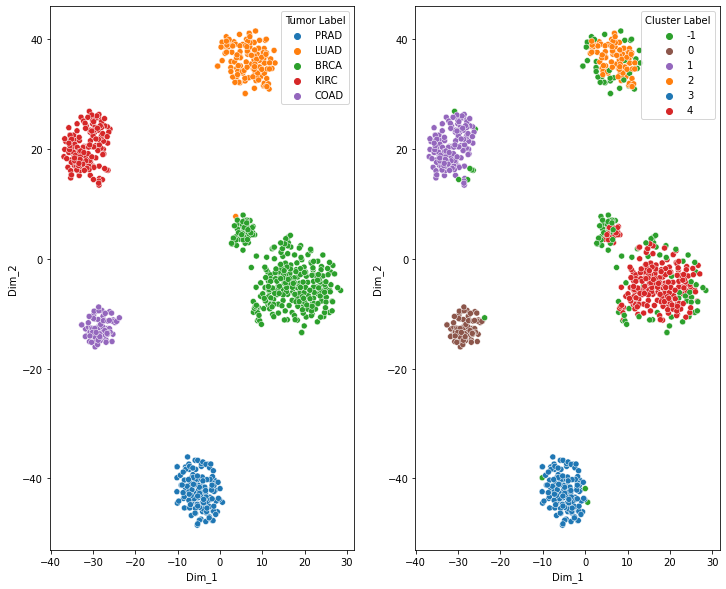

In [ ]:
# reshaping hdblabels into a 2 dimensional array
hdblabels = np.reshape(hdblabels,(-1,1))

tsne_df_hdb=tsne_df.copy()

tsne_df_hdb['Cluster Label']=hdblabels

plt.figure(figsize = (12, 10))

# Return a list of colors in colors variable
colors = sns.color_palette()

modes_gt=tsne_df_hdb['Tumor Label'].unique()
palette_gt = {mode: color for mode, color in zip(modes_gt, colors)}

modes_clus=tsne_df_hdb['Cluster Label'].unique()
palette_clus = {mode: color for mode, color in zip(modes_clus, colors)}

# visualizing the HDBSCAN based clustering on t SNE transformed data

plt.figure(figsize = (12, 10))
ax = plt.subplot(1,2,1)
sns.scatterplot(x="Dim_1", y="Dim_2", data=tsne_df_hdb, ax= ax,hue='Tumor Label',palette=palette_gt,alpha=1);
ax = plt.subplot(1,2,2)
sns.scatterplot(x="Dim_1", y="Dim_2", data=tsne_df_hdb, ax= ax, hue='Cluster Label',palette=palette_clus,alpha=1);
plt.show()

# clustering using HDBSCAN on Tumor dataset (dataset 2) 

In [ ]:
# evaluating HDBSCAN performance

# importing library for calculating performance metrics for sklearn 
import sklearn.metrics.pairwise as smp

# calculating intrinsic measures :  silhouette score, Davies Bouldin score and Calinski and Harabasz score 

pairwise_dist_sk = smp.euclidean_distances(data)
SIL_s=metrics.silhouette_score(pairwise_dist_sk , hdblabels)
DB_s=metrics.davies_bouldin_score(pairwise_dist_sk , hdblabels)
CH_s=metrics.calinski_harabasz_score(pairwise_dist_sk , hdblabels)

# calculating extrinsic measures: rand index and completeness
y_true=np.array(labels).reshape(-1)
y_pred=np.array(hdblabels).reshape(-1)

RI_s=metrics.rand_score(y_true,y_pred)
CM_s=metrics.completeness_score(y_true,y_pred)


print('Intrinsic Measure:\n')
print(f'Silhouette score: {SIL_s:.3f}')
print(f'Davies-Bouldin score: {DB_s:.3f}')
print(f'Calinski and Harabasz score: {CH_s:.3f}')
print('')
print('Extrinsic Measure:\n')
print(f'Random index: {RI_s:.3f}')
print(f'Completeness score: {CM_s:.3f}')

Intrinsic Measure:

Silhouette score: 0.406
Davies-Bouldin score: 1.134
Calinski and Harabasz score: 475.696

Extrinsic Measure:

Random index: 0.914
Completeness score: 0.781


## Standard behaviour of the cluster validity indices used
The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

The minimum value for Davies-Bouldin score is 0, with lower values indicating better clustering.

The higher the Calinski and Harabasz score , the better the performances.

The Rand Index may only yield a value between 0 and 1 with higher value indivcating better clustering.

Completeness Score is a value between 0.0 and 1.0. 1.0 stands for perfectly complete labeling.

# Computing clustering using HDBSCAN on Seeds dataset (dataset 3) 


In [ ]:
# changing the directory to where the folder for the dataset is located
%cd /content/drive/My Drive/

/content/drive/My Drive


In [ ]:
#load the data into the memory
seeds_data = pd.read_csv('seeds.csv', header=None)

In [ ]:
data = seeds_data.iloc[:, :-1] #features
labels = seeds_data.iloc[:, -1] #labels

In [ ]:
# Displaying the number of instances and attributes
print(data.shape)

(210, 7)


In [ ]:
# Total null values in each column
data.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64

In [ ]:
#calculate the TSNE
tsne = TSNE(n_components = 2, random_state = 0,perplexity=50)

tsne= model.fit_transform(data)

labels=np.array(labels).reshape(-1,1)

# creating a new data frame which help us in plotting the t SNE transformed data
tsne_data = np.concatenate((tsne, labels), axis=1)
tsne_df = pd.DataFrame(data = tsne_data, columns =("Dim_1", "Dim_2", "Seed Label"))

In [ ]:
# Compute HDBSCAN
hdb = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=2).fit(data)

# compute labels for clusters formed
hdblabels = hdb.labels_

#printing unique clusters
np.unique(hdblabels)

array([-1,  0,  1,  2])

In [ ]:
# Number of clusters
no_clusters = len(np.unique(hdblabels))

print('Estimated no. of clusters: %d' % no_clusters)

Estimated no. of clusters: 4


<Figure size 864x720 with 0 Axes>

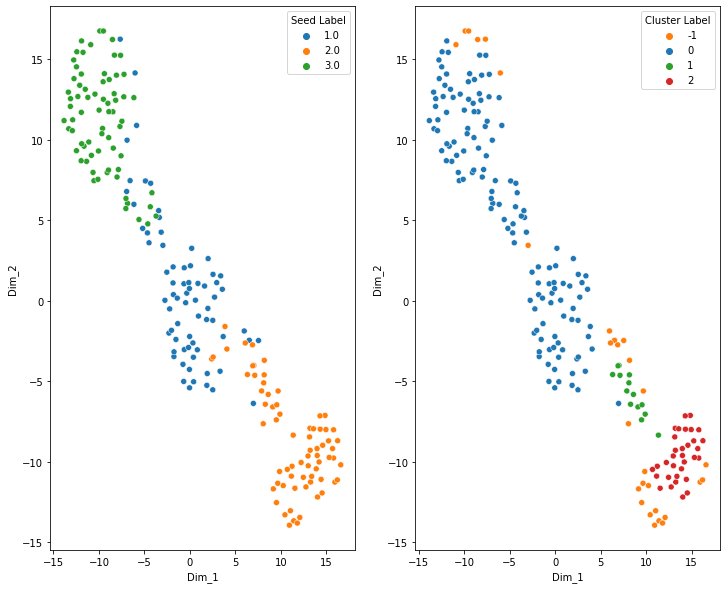

In [ ]:
# reshaping hdblabels into a 2 dimensional array
hdblabels = np.reshape(hdblabels,(-1,1))
 
tsne_df_hdb=tsne_df.copy()

tsne_df_hdb['Cluster Label']=hdblabels

plt.figure(figsize = (12, 10))

# Return a list of colors in colors variable
colors = sns.color_palette()

modes_gt=tsne_df_hdb['Seed Label'].unique()
palette_gt = {mode: color for mode, color in zip(modes_gt, colors)}

modes_clus=tsne_df_hdb['Cluster Label'].unique()
palette_clus = {mode: color for mode, color in zip(modes_clus, colors)}

# # visualizing the HDBSCAN based clustering on t SNE transformed data

plt.figure(figsize = (12, 10))
ax = plt.subplot(1,2,1)
sns.scatterplot(x="Dim_1", y="Dim_2", data=tsne_df_hdb, ax= ax,hue='Seed Label',palette=palette_gt,alpha=1);
ax = plt.subplot(1,2,2)
sns.scatterplot(x="Dim_1", y="Dim_2", data=tsne_df_hdb, ax= ax, hue='Cluster Label',palette=palette_clus,alpha=1);
plt.show()

# # clustering using HDBSCAN on Seeds dataset (dataset 3) 


In [ ]:
# evaluating HDBSCAN performance

# importing library for calculating performance metrics for sklearn 
import sklearn.metrics.pairwise as smp

# calculating intrinsic measures : silhouette score, Davies Bouldin score and Calinski and Harabasz score 
pairwise_dist_sk = smp.euclidean_distances(data)

SIL_s=metrics.silhouette_score(pairwise_dist_sk , hdblabels)
DB_s=metrics.davies_bouldin_score(pairwise_dist_sk , hdblabels)
CH_s=metrics.calinski_harabasz_score(pairwise_dist_sk , hdblabels)

# calculating extrinsic measures: rand index and Completeness score
y_true=np.array(labels).reshape(-1)
y_pred=np.array(hdblabels).reshape(-1)

RI_s=metrics.rand_score(y_true,y_pred)
CM_s=metrics.completeness_score(y_true,y_pred)

print('Intrinsic Measure:\n')
print(f'Silhouette score: {SIL_s:.3f}')
print(f'Davies-Bouldin score: {DB_s:.3f}')
print(f'Calinski and Harabasz score: {CH_s:.3f}')
print('')
print('Extrinsic Measure:\n')
print(f'Random index: {RI_s:.3f}')
print(f'Completeness score: {CM_s:.3f}')

Intrinsic Measure:

Silhouette score: 0.286
Davies-Bouldin score: 1.609
Calinski and Harabasz score: 97.553

Extrinsic Measure:

Random index: 0.671
Completeness score: 0.449


## Standard behaviour of the cluster validity indices used
The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

The minimum value for Davies-Bouldin score is 0, with lower values indicating better clustering.

The higher the Calinski and Harabasz score , the better the performances.

The Rand Index may only yield a value between 0 and 1 with higher value indivcating better clustering.

Completeness Score is a value between 0.0 and 1.0. 1.0 stands for perfectly complete labeling.

# Q2 (e)

# Strategy adopted for Hyperparameter tuning:

Varying the input parameters for HDBSCAN.
The input parameters are:

min_cluster_size : The minimum size that the final clusters will be, the higher ,this value the bigger the clusters will be.

min_samples :The minimum number of neighbours to a core point. So the higher this value is, the more points are going to be discarded as noise or outliers.

In [ ]:
#load the digits dataset into memory
digits = datasets.load_digits()

digits_data = digits.data #features
digits_label = digits.target #labels

#convert to a dataframe
data = pd.DataFrame(digits_data)
labels = digits_label

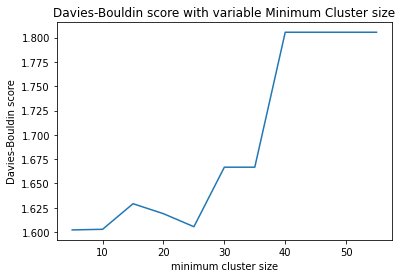

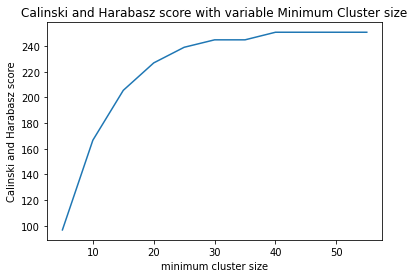

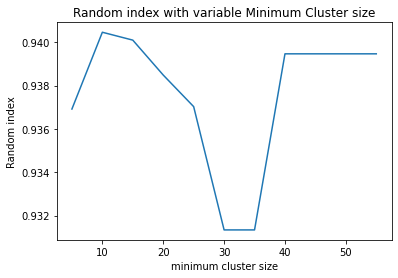

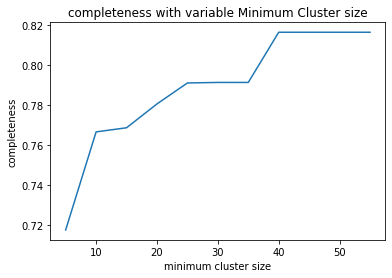

In [ ]:
# initializing lists for storing performance metrics for variable Minimum cluster sizes
DB = []  # Davies-Bouldin score
CH = []   #Calinski and Harabasz score
RI = []   # Random index 
CM = []   # Completeness score

# Varying the parameter min_cluster_size from 5 to 55

cluster_size = [5, 10, 15, 20, 25, 30, 35,  40 , 45, 50 ,55]

for i in cluster_size:
    hdb = hdbscan.HDBSCAN(min_cluster_size=i, min_samples=1).fit(data)

    # compute labels for clusters formed
    hdblabels = hdb.labels_

    # evaluating HDBSCAN performance by varying min_cluster_size from 5 to 55

    pairwise_dist_sk = smp.euclidean_distances(data)

    # The extrinsic and intrinsic performance measures that consistantly showed expected behaviour have been chosen here
    # These are - Davies Bouldin score,Calinski and Harabasz score,  Completeness and Random Index
    DBS=metrics.davies_bouldin_score(pairwise_dist_sk ,hdblabels)
    CHS=metrics.calinski_harabasz_score(pairwise_dist_sk , hdblabels)

    y_true=np.array(labels).reshape(-1)
    y_pred=np.array(hdblabels).reshape(-1)
    
    RIS = metrics.rand_score(y_true,y_pred)
    completeness = metrics.completeness_score(y_true, y_pred)

    DB.append(DBS)
    CH.append(CHS)
    RI.append(RIS)
    CM.append(completeness)

## Visualization of HDBSCAN performance based on Davies-Bouldin score vs Minimum cluster size
plt.plot(cluster_size, DB) 
plt.xlabel('minimum cluster size') 
plt.ylabel('Davies-Bouldin score') 
plt.title('Davies-Bouldin score with variable Minimum Cluster size') 
plt.show() 

## Visualization of HDBSCAN performance based on Calinski and Harabasz score vs Minimum cluster size
plt.plot(cluster_size, CH) 
plt.xlabel('minimum cluster size') 
plt.ylabel('Calinski and Harabasz score') 
plt.title('Calinski and Harabasz score with variable Minimum Cluster size') 
plt.show() 

## Visualization of HDBSCAN performance based on Random index vs Minimum cluster size
plt.plot(cluster_size, RI) 
plt.xlabel('minimum cluster size') 
plt.ylabel('Random index') 
plt.title('Random index with variable Minimum Cluster size') 
plt.show() 

# Visualization of HDBSCAN performance based on completeness vs Minimum cluster size
plt.plot(cluster_size, CM) 
plt.xlabel('minimum cluster size') 
plt.ylabel('completeness') 
plt.title('completeness with variable Minimum Cluster size') 
plt.show() 

All the cluster validity indices show best performance at min_cluster_size = 40 , so we will choose that.

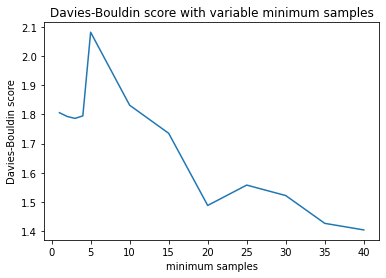

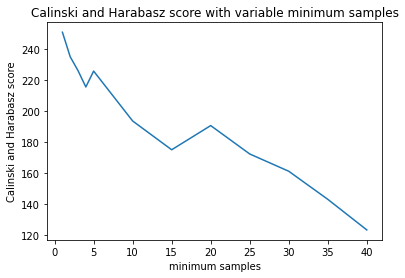

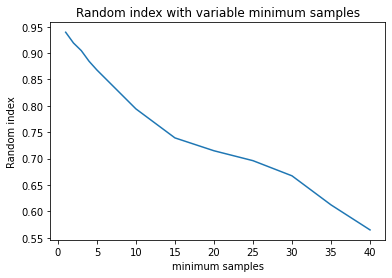

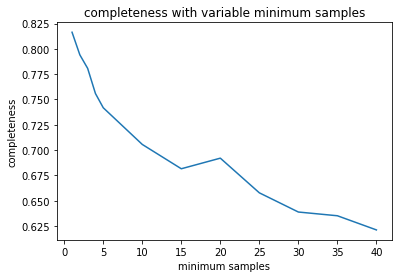

In [ ]:
# initializing lists for storing performance metrics for variable minimum samples
DB = []  # Davies-Bouldin score
CH = []   #Calinski and Harabasz score
RI = []   # Random index 
CM = []   # Completeness score

# Varying the parameter min_samples from 1 to 40

minimum_samples = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40]

for i in minimum_samples:
    hdb = hdbscan.HDBSCAN(min_cluster_size=40, min_samples=i).fit(data)

    # compute labels for clusters formed
    hdblabels = hdb.labels_

    # evaluating HDBSCAN performance by varying min_samples from 1 to 40

    pairwise_dist_sk = smp.euclidean_distances(data)

    # The extrinsic and intrinsic performance measures that consistantly showed expected behaviour have been chosen here
    # These are - Davies Bouldin score,Calinski and Harabasz score,  Completeness and Random Index
    DBS=metrics.davies_bouldin_score(pairwise_dist_sk ,hdblabels)
    CHS=metrics.calinski_harabasz_score(pairwise_dist_sk , hdblabels)

    y_true=np.array(labels).reshape(-1)
    y_pred=np.array(hdblabels).reshape(-1)

    RIS = metrics.rand_score(y_true,y_pred)
    completeness = metrics.completeness_score(y_true, y_pred)


    DB.append(DBS)
    CH.append(CHS)
    RI.append(RIS)
    CM.append(completeness)

## Visualization of HDBSCAN performance based on Davies-Bouldin score vs Minimum samples
plt.plot(minimum_samples, DB) 
plt.xlabel('minimum samples') 
plt.ylabel('Davies-Bouldin score') 
plt.title('Davies-Bouldin score with variable minimum samples') 
plt.show() 

## Visualization of HDBSCAN performance based on Calinski and Harabasz score vs Minimum samples
plt.plot(minimum_samples, CH) 
plt.xlabel('minimum samples') 
plt.ylabel('Calinski and Harabasz score') 
plt.title('Calinski and Harabasz score with variable minimum samples') 
plt.show() 

## Visualization of HDBSCAN performance based on Random index vs Minimum samples
plt.plot(minimum_samples, RI) 
plt.xlabel('minimum samples') 
plt.ylabel('Random index') 
plt.title('Random index with variable minimum samples') 
plt.show() 

# Visualization of HDBSCAN performance based on completeness vs Minimum samples
plt.plot(minimum_samples, CM) 
plt.xlabel('minimum samples') 
plt.ylabel('completeness') 
plt.title('completeness with variable minimum samples') 
plt.show() 



The cluster validity indices: Completeness and Random Index give best performance at min_samples = 1 , whereas Davies Bouldin gives best performance with min_samples = 5, so we will choose min_samples = 1 and 5 both.

Performance analysis with min_cluster_size = 40 and min_samples = 5

In [ ]:
hdb = hdbscan.HDBSCAN(min_cluster_size=40, min_samples=5).fit(data)

# compute labels for clusters formed
hdblabels = hdb.labels_

print("Number of clusters:")
print(np.unique(hdblabels))
print(" ")
pairwise_dist_sk = smp.euclidean_distances(data)

# The extrinsic and intrinsic performance measures that consistantly showed expected behaviour have been chosen here
# These are - silhouette score, Davies Bouldin score and Calinski and Harabasz score, Random Index and Completeness
SIL=metrics.silhouette_score(pairwise_dist_sk , hdblabels)
DB=metrics.davies_bouldin_score(pairwise_dist_sk ,hdblabels)
CH=metrics.calinski_harabasz_score(pairwise_dist_sk , hdblabels)

y_true=np.array(labels).reshape(-1)
y_pred=np.array(hdblabels).reshape(-1)

RIS = metrics.rand_score(y_true,y_pred)
CM = metrics.completeness_score(y_true, y_pred)

print(f'Silhouette score: {SIL:.3f}')
print(f'Davies-Bouldin score: {DB:.3f}')
print(f'Calinski and Harabasz score: {CH:.3f}')
print(f'Random index: {RIS:.3f}')
print(f'Completeness score: {CM:.3f}')


Number of clusters:
[-1  0  1  2  3  4  5  6]
 
Silhouette score: 0.167
Davies-Bouldin score: 2.081
Calinski and Harabasz score: 225.696
Random index: 0.868
Completeness score: 0.742


In [ ]:
 hdb = hdbscan.HDBSCAN(min_cluster_size=40, min_samples=1).fit(data)

# compute labels for clusters formed
hdblabels = hdb.labels_

print("Number of clusters:")
print(np.unique(hdblabels))
print(" ")

pairwise_dist_sk = smp.euclidean_distances(data)

# The extrinsic and intrinsic performance measures that consistantly showed expected behaviour have been chosen here
# These are -silhouette score, Davies Bouldin score and Calinski and Harabasz score, Random Index and Completeness
SIL=metrics.silhouette_score(pairwise_dist_sk , hdblabels)
DB=metrics.davies_bouldin_score(pairwise_dist_sk ,hdblabels)
CH=metrics.calinski_harabasz_score(pairwise_dist_sk , hdblabels)

y_true=np.array(labels).reshape(-1)
y_pred=np.array(hdblabels).reshape(-1)

RIS = metrics.rand_score(y_true,y_pred)
CM = metrics.completeness_score(y_true, y_pred)

print(f'Silhouette score: {SIL:.3f}')
print(f'Davies-Bouldin score: {DB:.3f}')
print(f'Calinski and Harabasz score: {CH:.3f}')
print(f'Random index: {RIS:.3f}')
print(f'Completeness score: {CM:.3f}')

Number of clusters:
[-1  0  1  2  3  4  5  6  7  8  9]
 
Silhouette score: 0.199
Davies-Bouldin score: 1.806
Calinski and Harabasz score: 250.756
Random index: 0.939
Completeness score: 0.816


The number of clusters formed using min_cluster_size=40 and min_samples=1 are 11 including one cluster for noise points.
The number of clusters formed using min_cluster_size=40 and min_samples=5 are 8 including one cluster for noise points.
Hence, the best performance is with min_cluster_size=40 and min_samples=1

# Q2 (f)

# Confirmation of selection Hypothesis

The results obtained for performance evaluation using cluster validity indices when applied on all three datasets are consistant for  Davies Bouldin score, Calinski and Harabasz score, 
Completeness and Random Index.

These three indicate confirm our selection hypothesis as in section 1 (a).

However, the other cluster validity indices give varying results/discrepancies and this is in line with the fact that the varying behaviour of cluster validity indices
is difficult to understand and interpret and has been an active area of research. 

Density based clustering performs good on dataset 1 and poorly on the other two datasets.

# Q2 (g)

# Checking the results obtained after clustering on random data on Prototype Clustering.

Checking the results obtained after clustering on random data on HDBSCAN.
The strategy for checking whether the results obtained after clustering are valid i.e. they are significantly different from random data, a random dataset has been created  by choosing top 50 % instances of the original data and the performance validation has been done using various cluster validity indices as used earlier in part 2 (e))

Experiments for UCI ML handwritten digit

To generate a random dataset the top 50% samples from the UCI ML handwritten digit dataset (dataset 1) have been chosen to make a new dataframe data_random

In [ ]:
#loading the dataset
digits_data_ = digits.data # data
digits_labels_= digits.target #labels

# creating dataframes
digits_data_1 = pd.DataFrame(digits_data_)
digits_labels_1 = pd.DataFrame(digits_labels_)

In [ ]:
#concatenating data and labels
data_1 = pd.concat([digits_data_1, digits_labels_1], axis=1)
data_1.shape

(1797, 65)

In [ ]:
# Taking top 50% data to create the random sample.
data_random = data_1.iloc[:898, :]

# Creating dataframe
data_random = pd.DataFrame(data_random)
data_random.shape

(898, 65)

In [ ]:
data_random = data_random.iloc[:, :-1] #data
labels_random = data_random.iloc[:, -1] #features

In [ ]:
# Compute HDBSCAN
hdb = hdbscan.HDBSCAN(min_cluster_size=40, min_samples=1).fit(data_random)

# compute labels for clusters formed
hdblabels = hdb.labels_

#printing unique clusters
np.unique(hdblabels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8])

In [ ]:
# Number of clusters
no_clusters = len(np.unique(hdblabels))

print('Estimated no. of clusters: %d' % no_clusters)

Estimated no. of clusters: 10


In [ ]:
# reshaping hdblabels into a 2 dimensional array
hdblabels = np.reshape(hdblabels,(-1,1))

In [ ]:
# evaluating HDBSCAN performance

import sklearn.metrics.pairwise as smp

# Calculating the performance metrics
pairwise_dist_sk = smp.euclidean_distances(data_random)

SIL_s=metrics.silhouette_score(pairwise_dist_sk , hdblabels)
DB_s=metrics.davies_bouldin_score(pairwise_dist_sk , hdblabels)
CH_s=metrics.calinski_harabasz_score(pairwise_dist_sk , hdblabels)

y_true=np.array(labels_random).reshape(-1)
y_pred=np.array(hdblabels).reshape(-1)

RI_s=metrics.rand_score(y_true,y_pred)
CM_s=metrics.completeness_score(y_true,y_pred)

# Printing the performance metrics
print('Intrinsic Measure:\n')
print(f'Silhouette score: {SIL_s:.3f}')
print(f'Davies-Bouldin score: {DB_s:.3f}')
print(f'Calinski and Harabasz score: {CH_s:.3f}')
print('')
print('Extrinsic Measure:\n')
print(f'Random index: {RI_s:.3f}')
print(f'Completeness score: {CM_s:.3f}')


Intrinsic Measure:

Silhouette score: 0.236
Davies-Bouldin score: 1.901
Calinski and Harabasz score: 134.460

Extrinsic Measure:

Random index: 0.181
Completeness score: 0.031


It can be very clearly seen that the random sample of the dataset 1 is giving very poor results for all performance metrics/cluster validity indices as compared to taking the full dataset 1.

Checking the results obtained after clustering on random data on HDBSCAN.
To generate a random dataset the top 50% samples from the Tumor dataset (dataset 2) have been chosen to make a new dataframe data_random

In [ ]:
# mounting the google drive for importing dataset
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# changing the directory to where the folder for the dataset is located
%cd /content/drive/My Drive//TCGA-PANCAN-HiSeq-801x20531/


/content/drive/My Drive/TCGA-PANCAN-HiSeq-801x20531


In [ ]:
# load the data into the memory 
tumor_data = pd.read_csv('data.csv',index_col=0)
tumor_labels = pd.read_csv('labels.csv', index_col=0)

In [ ]:
# extracting the feature columns
cols=tumor_data.columns.tolist()
feature_cols=cols[:-2]

In [ ]:
# mapping class names to class numbers
tumor_map={'BRCA':0,'KIRC':1,'LUAD':2,'PRAD':3,'COAD':4}
tumor_data['class'] = tumor_labels['Class']
tumor_data['classno'] = tumor_labels['Class'].map(tumor_map)
data = tumor_data[feature_cols]
labels = tumor_data['classno']

In [ ]:
#concatenating data and labels
data_1 = pd.concat([data, labels], axis=1)
data_1.shape

(801, 20530)

In [ ]:
# Taking top 50% data to create the random sample.
data_random = data_1.iloc[:400, :]

# Creating dataframe
data_random = pd.DataFrame(data_random)
data_random.shape

(400, 20530)

In [ ]:
data_random = data_random.iloc[:, :-1] #data
labels_random = data_random.iloc[:, -1] #features

In [ ]:
# Compute HDBSCAN
hdb = hdbscan.HDBSCAN(min_cluster_size=40, min_samples=1).fit(data_random)

# compute labels for clusters formed
hdblabels = hdb.labels_

#printing unique clusters
np.unique(hdblabels)

array([-1,  0,  1,  2,  3])

In [ ]:
# Number of clusters
no_clusters = len(np.unique(hdblabels))

print('Estimated no. of clusters: %d' % no_clusters)

Estimated no. of clusters: 5


In [ ]:
# reshaping hdblabels into a 2 dimensional array
hdblabels = np.reshape(hdblabels,(-1,1))

In [ ]:
# evaluating HDBSCAN performance

import sklearn.metrics.pairwise as smp

# Calculating the performance metrics
pairwise_dist_sk = smp.euclidean_distances(data_random)

SIL_s=metrics.silhouette_score(pairwise_dist_sk , hdblabels)
DB_s=metrics.davies_bouldin_score(pairwise_dist_sk , hdblabels)
CH_s=metrics.calinski_harabasz_score(pairwise_dist_sk , hdblabels)

y_true=np.array(labels_random).reshape(-1)
y_pred=np.array(hdblabels).reshape(-1)

RI_s=metrics.rand_score(y_true,y_pred)
CM_s=metrics.completeness_score(y_true,y_pred)

# Printing the performance metrics
print('Intrinsic Measure:\n')
print(f'Silhouette score: {SIL_s:.3f}')
print(f'Davies-Bouldin score: {DB_s:.3f}')
print(f'Calinski and Harabasz score: {CH_s:.3f}')
print('')
print('Extrinsic Measure:\n')
print(f'Random index: {RI_s:.3f}')
print(f'Completeness score: {CM_s:.3f}')


Intrinsic Measure:

Silhouette score: 0.370
Davies-Bouldin score: 1.189
Calinski and Harabasz score: 220.239

Extrinsic Measure:

Random index: 0.790
Completeness score: 1.000


It can be very clearly seen that the random sample of the Tumor dataset (dataset 2) is giving very poor results for all performance metrics/cluster validity indices as compared to taking the full dataset 2.

Checking the results obtained after clustering on random data on HDBSCAN.
To generate a random dataset the top 50% samples from the Seeds dataset (dataset 3) have been chosen to make a new dataframe data_random

In [ ]:
# changing the directory to where the folder for the dataset is located
%cd /content/drive/My Drive/

/content/drive/My Drive


In [ ]:
#load the data into the memory
seeds_data = pd.read_csv('seeds.csv', header=None)

In [ ]:
data = seeds_data.iloc[:, :-1] #features
labels = seeds_data.iloc[:, -1] #labels

In [ ]:
#concatenating data and labels
data_1 = pd.concat([data, labels], axis=1)
data_1.shape

(210, 8)

In [ ]:
# Taking top 50% data to create the random sample.
data_random = data_1.iloc[:105, :]

# Creating dataframe
data_random = pd.DataFrame(data_random)
data_random.shape

(105, 8)

In [ ]:
data_random = data_random.iloc[:, :-1] #data
labels_random = data_random.iloc[:, -1] #features

In [ ]:
# Compute HDBSCAN
hdb = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=2).fit(data_random)

# compute labels for clusters formed
hdblabels = hdb.labels_

#printing unique clusters
np.unique(hdblabels)

array([-1,  0,  1])

In [ ]:
# Number of clusters
no_clusters = len(np.unique(hdblabels))

print('Estimated no. of clusters: %d' % no_clusters)

Estimated no. of clusters: 3


In [ ]:
# reshaping hdblabels into a 2 dimensional array
hdblabels = np.reshape(hdblabels,(-1,1))

In [ ]:
# evaluating HDBSCAN performance

import sklearn.metrics.pairwise as smp

# Calculating the performance metrics
pairwise_dist_sk = smp.euclidean_distances(data_random)

SIL_s=metrics.silhouette_score(pairwise_dist_sk , hdblabels)
DB_s= metrics.davies_bouldin_score(pairwise_dist_sk , hdblabels)
CH_s=metrics.calinski_harabasz_score(pairwise_dist_sk , hdblabels)

y_true=np.array(labels_random).reshape(-1)
y_pred=np.array(hdblabels).reshape(-1)

RI_s=metrics.rand_score(y_true,y_pred)
CM_s=metrics.completeness_score(y_true,y_pred)

# Printing the performance metrics
print('Intrinsic Measure:\n')
print(f'Silhouette score: {SIL_s:.3f}')
print(f'Davies-Bouldin score: {DB_s:.3f}')
print(f'Calinski and Harabasz score: {CH_s:.3f}')
print('')
print('Extrinsic Measure:\n')
print(f'Random index: {RI_s:.3f}')
print(f'Completeness score: {CM_s:.3f}')

Intrinsic Measure:

Silhouette score: 0.392
Davies-Bouldin score: 0.920
Calinski and Harabasz score: 79.661

Extrinsic Measure:

Random index: 0.397
Completeness score: 0.943


It can be very clearly seen that the random sample of the Seeds dataset (dataset 3) is giving very poor results for all performance metrics/cluster validity indices as compared to taking the full dataset 3.


# References

https://hdbscan.readthedocs.io/en/latest/
    
Ricardo J. G. B. Campello, Davoud Moulavi, Arthur Zimek, and Jörg Sander. 2015. Hierarchical Density Estimates for Data Clustering, Visualization, and Outlier Detection. ACM Trans. Knowl. Discov. Data 10, 1, Article 5 (July 2015), 51 pages.